In [135]:
import cPickle
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import signal

%matplotlib inline

file_path = "../"
uber2014 = "uber_trips_2014_datetime.pickle"
uber2015 = "uber_trips_2015_datetime.pickle"
#print file_path



(4391,)
[ 138   66   53 ..., 2246 1961 1347]


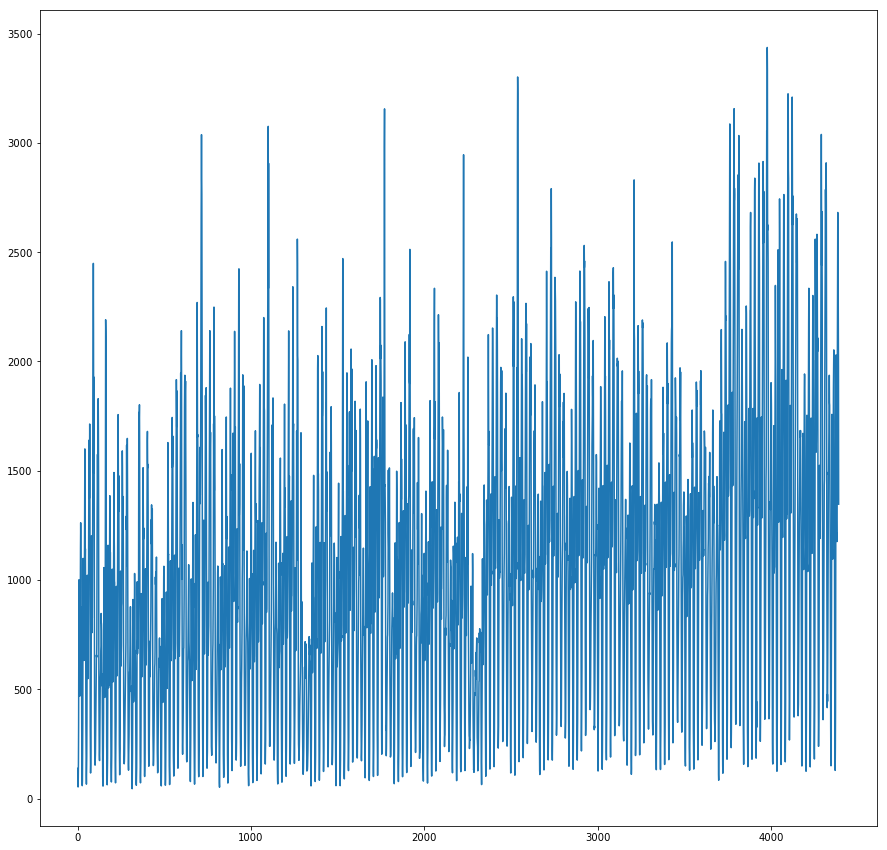

In [132]:
def read_resample(name,rule):
    fp = open(name,'rb')
    df = cPickle.load(fp)
    #print df
    #'pickup_latitude'
    try:
        a = df['pickup_latitude'].resample(rule=rule).count()
    except:
        a = df['affiliate_base'].resample(rule=rule).count()
    a = a.as_matrix()
    print a.shape
    print a
    return a
    
data = read_resample(file_path + uber2014,'H')
plt.figure(figsize=(15,15))
plt.plot(range(data.shape[0]),data)

183
23.9945355191


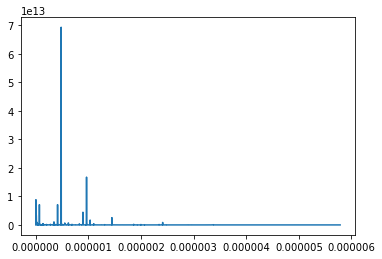

In [133]:
fs = 1/(24*3600.0)
f, Pxx_den = signal.periodogram(a, fs)
plt.plot(f, Pxx_den)
print np.argmax(Pxx_den)
print (1/f[np.argmax(Pxx_den)])/(24*3600.0)

(4344,)
[6162 5744 6838 ..., 5955 5749 4731]


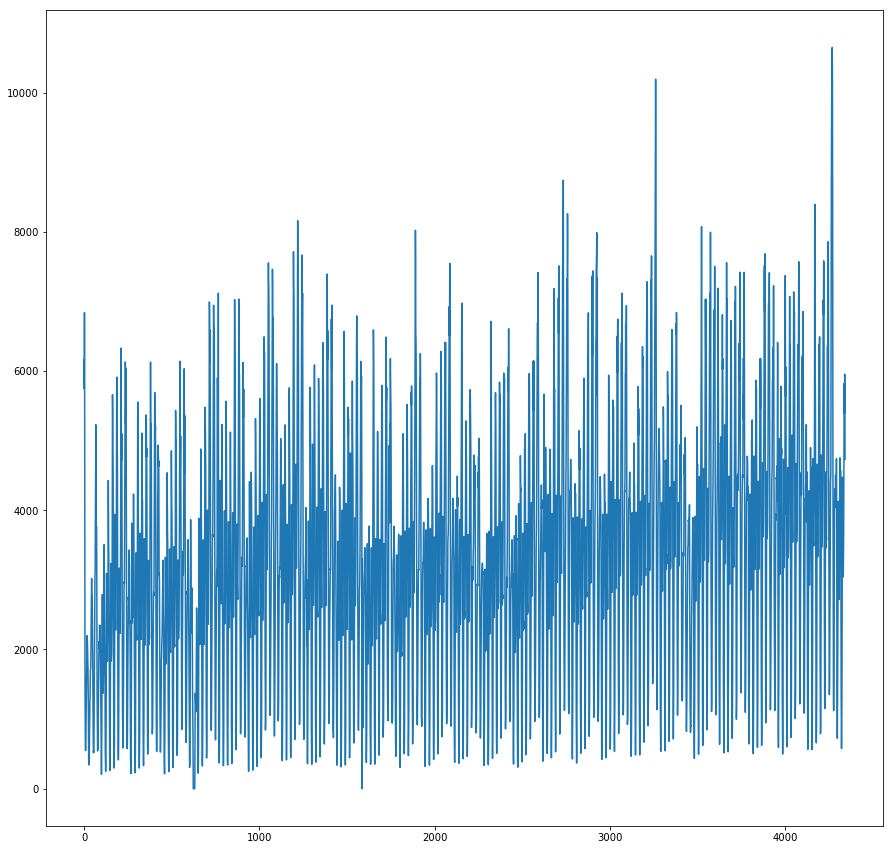

In [134]:
data = read_resample(file_path + uber2015,'H')
plt.figure(figsize=(15,15))
plt.plot(range(data.shape[0]),data)

In [270]:
def train_arma(p,q,data_1,nn):
    arma_mod = sm.tsa.ARMA(data_1[0:nn], order=(p,q))
    arma_res = arma_mod.fit(trend='c', disp=-1)
    return arma_res

def predict_arma(steps,arma_res):
    data_pred, stderr, conf_int = arma_res.forecast(steps=steps,alpha=0.3)
    print data_pred
    print conf_int
    return data_pred, stderr, conf_int

data = read_resample(file_path + uber2014,'D')
data = data.astype('float64')
#print data.shape
nn = 173
end_nn = 183
p = 7
q = 4

model = train_arma(p,q,data,nn)
data_pred, stderr, conf_int = predict_arma(end_nn-nn+1,model)
#print data[0:nn]
#arma_mod = sm.tsa.ARMA(data[0:nn], order=(p,q))

(183,)
[14546 17474 20701 26714 19521 13445 19550 16188 16843 20041 20420 18170
 12112 12674 20641 17717 20973 18074 14602 11017 13162 16975 20346 23352
 25095 24925 14677 15475 22835 36251 23375 24235 22234 13918 17859 19300
 21891 27513 26385 22550 14901 17470 19498 22218 26301 32493 22294 16508
 18315 20860 23508 26802 26465 14651 10841 10202 17004 22240 24930 24413
 21261 15967 17503 22674 22831 28371 24683 20889 15749 23244 22874 25716
 29844 31207 19327 14511 17778 21807 24647 28594 24271 19940 16322 17735
 20779 26460 28516 24895 21208 17107 18395 21228 26480 21597 14148 10890
 11443 18280 25763 27817 30541 28752 25936 21082 27350 33845 28607 30710
 29860 25726 21212 23578 29029 34073 32050 29975 27708 22590 23981 27589
 30740 33541 32353 28678 23146 24952 28094 30495 32759 30411 26286 20584
 22632 29646 29788 30457 28974 26234 21209 21956 24834 27955 32304 29512
 27097 22036 22093 24550 27018 28597 27424 23930 23271 19961 28831 32631
 38360 42319 40520 30134 30360 34560 35910 3

/Users/feiyanhu/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


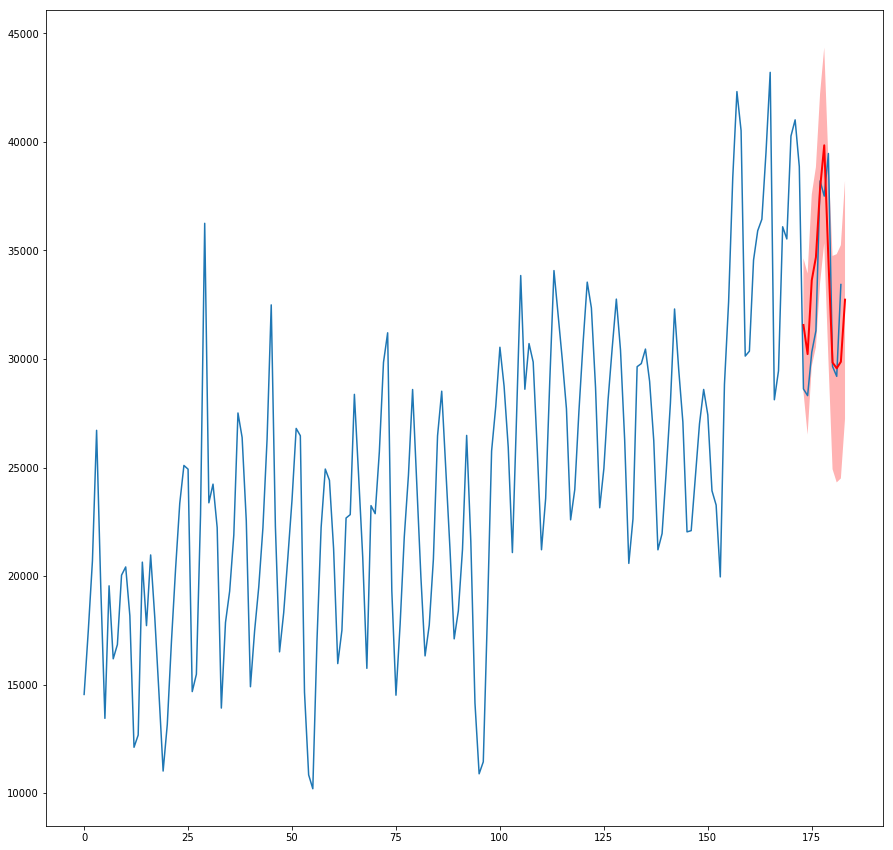

In [271]:
fig, ax = plt.subplots(1,figsize=(15,15))

ax.plot(range(data.shape[0]),data)
ax.plot(range(nn,end_nn+1,1), data_pred, lw=2, label='mean population 2', color='red')
ax.fill_between(range(nn,end_nn+1,1), conf_int[:,0], conf_int[:,1], facecolor='red', alpha=0.3)
#plt.plot(range(nn,end_nn+1,1),data_pred)

(181,)
[ 55383  38469  57383  39998  41858  51407  60905  70034  69035  77031
  56011  56674  62227  62083  65473  71160  72071  71112  44958  53777
  57984  64301  70457  79323  56782  42606  24855  59271  67743  82245
  90570  75397  67571  68839  65533  79367  84257  79737  61819  60973
  63702  71165  81781  96251  98583  87864  70789  71736  70991  87213
  99126  96839  65217  69985  77797  73475  82092  87250  86691  70839
  57460  75048  71931  77446  83134  81468  61824  53920  72185  65315
  74038  79272  90956  63421  54824  62886  70384  75839  95273  80745
  69337  60498  64400  73953  78552  84977  92527  75648  62780  78893
  69223  74069  75983  69189  58357  53565  68079  72023  77520  81439
  82547  67726  56655  63393  66534  78808  83855  94196  78107  78076
  68712  82124  92110  99688 106270  88673  64783  68863  75940  84330
  92329 104978  80300  65447  76195  80447  87361  90733  98359  80146
  70310  78437  84937  93624  99756 121557  94322  76414  85371  91062

/Users/feiyanhu/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


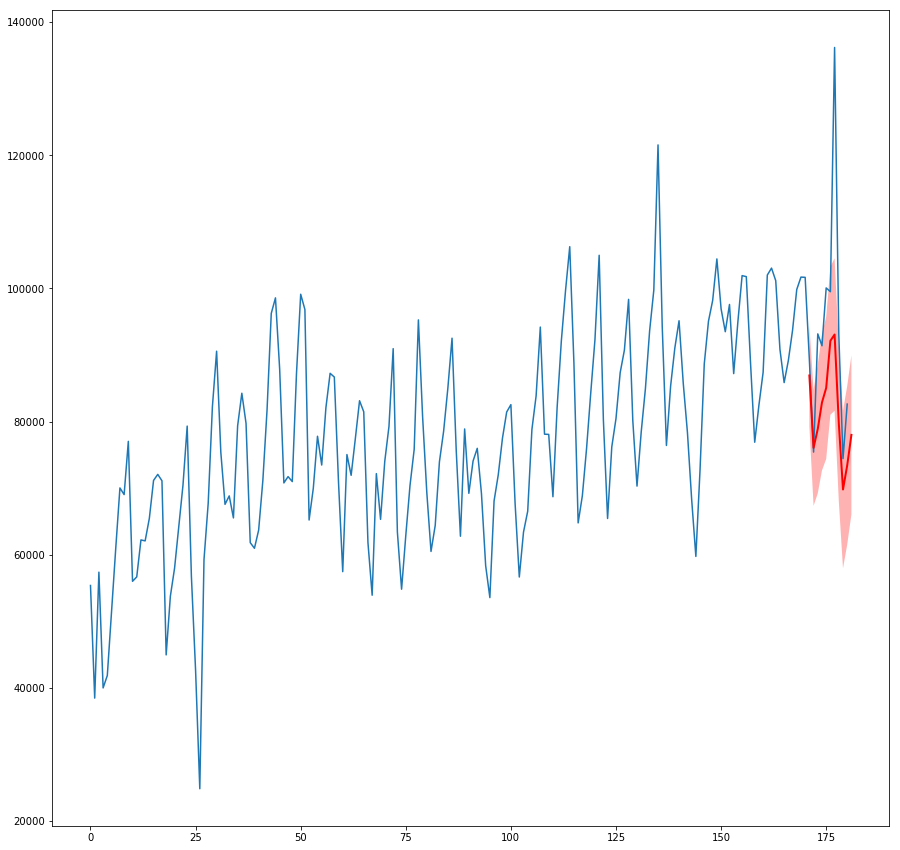

In [283]:
data = read_resample(file_path + uber2015,'D')
data = data.astype('float64')
#print data.shape
nn = data.shape[0] - 10
end_nn = data.shape[0]
p = 7
q = 4

model = train_arma(p,q,data,nn)
data_pred, stderr, conf_int = predict_arma(end_nn-nn+1,model)

fig, ax = plt.subplots(1,figsize=(15,15))

ax.plot(range(data.shape[0]),data)
ax.plot(range(nn,end_nn+1,1), data_pred, lw=2, label='mean population 2', color='red')
ax.fill_between(range(nn,end_nn+1,1), conf_int[:,0], conf_int[:,1], facecolor='red', alpha=0.3)
#plt.plot(range(nn,end_nn+1,1),data_pred)

[ 1460.36377681  1114.90407313  1059.28751059  1119.81173598  1111.36637784
  1296.9405161   1545.64031756  1399.99361251  1072.86724574  1022.68298737
  1074.11561439]
[[ 1362.79037771  1557.93717592]
 [  984.24387944  1245.56426681]
 [  916.99678273  1201.57823845]
 [  972.00628327  1267.6171887 ]
 [  958.1929296   1264.53982608]
 [ 1137.01647747  1456.86455472]
 [ 1373.50086435  1717.77977077]
 [ 1209.11211534  1590.87510968]
 [  868.31187761  1277.42261386]
 [  813.2233359   1232.14263885]
 [  862.55819269  1285.6730361 ]]


/Users/feiyanhu/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


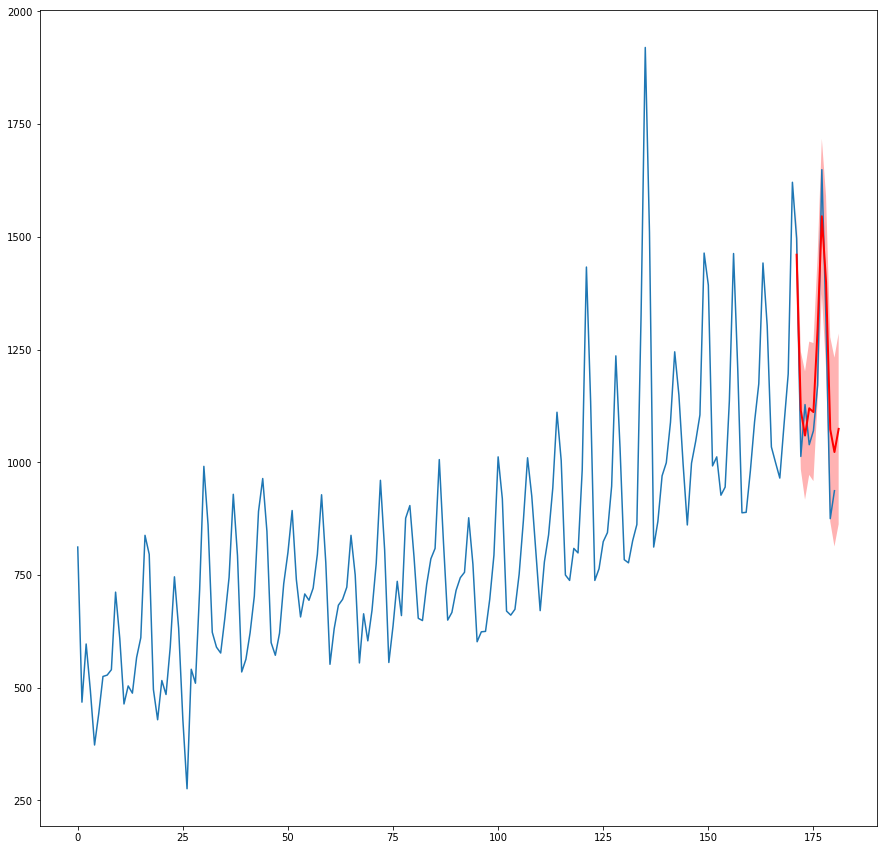

In [275]:
df = pd.read_csv('../uber_age_byday.csv')
c1 = df['<20'].as_matrix()
c1 = c1.astype('float64')
nn = c1.shape[0]-10
end_nn = c1.shape[0]
p = 5
q = 4

model = train_arma(p,q,c1,nn)
data_pred, stderr, conf_int = predict_arma(end_nn-nn+1,model)

fig, ax = plt.subplots(1,figsize=(15,15))

ax.plot(range(c1.shape[0]),c1)
ax.plot(range(nn,end_nn+1,1), data_pred, lw=2, label='mean population 2', color='red')
ax.fill_between(range(nn,end_nn+1,1), conf_int[:,0], conf_int[:,1], facecolor='red', alpha=0.3)

[ 76538.72935243  67655.77004109  66075.27381207  71825.42542646
  80835.73335992  85841.32672266  83182.3394283   74569.74155677
  66477.52335564  64792.22795481  70721.7121319 ]
[[ 69116.97266143  83960.48604343]
 [ 59351.46483392  75960.07524827]
 [ 57494.32490353  74656.2227206 ]
 [ 62994.64958421  80656.20126871]
 [ 71816.83243297  89854.63428686]
 [ 76613.85181138  95068.80163393]
 [ 73772.76620036  92591.91265623]
 [ 64979.55282495  84159.93028858]
 [ 56730.69442281  76224.35228847]
 [ 54894.96498504  74689.49092457]
 [ 60682.41422203  80761.01004177]]


/Users/feiyanhu/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


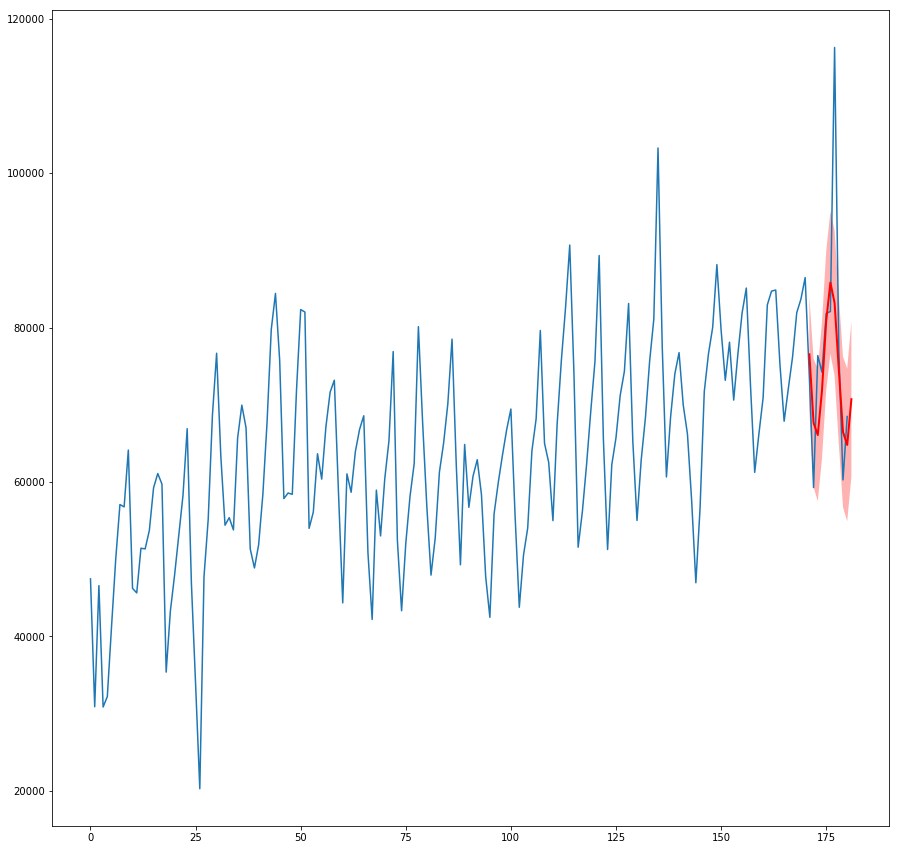

In [276]:
c1 = df['20-30'].as_matrix()
c1 = c1.astype('float64')
nn = c1.shape[0]-10
end_nn = c1.shape[0]
p = 5
q = 4

model = train_arma(p,q,c1,nn)
data_pred, stderr, conf_int = predict_arma(end_nn-nn+1,model)

fig, ax = plt.subplots(1,figsize=(15,15))

ax.plot(range(c1.shape[0]),c1)
ax.plot(range(nn,end_nn+1,1), data_pred, lw=2, label='mean population 2', color='red')
ax.fill_between(range(nn,end_nn+1,1), conf_int[:,0], conf_int[:,1], facecolor='red', alpha=0.3)

[ 10260.19993519  10068.32023035  10845.3459409   11910.46137209
  12570.55246958  12212.9042688   11193.04503736  10186.77396057
  10025.17175371  10746.64308138  11857.927657  ]
[[  9059.62134749  11460.7785229 ]
 [  8737.9925667   11398.64789399]
 [  9456.29405262  12234.39782918]
 [ 10484.77416755  13336.14857663]
 [ 11107.1584156   14033.94652355]
 [ 10715.72249702  13710.08604059]
 [  9660.07396054  12726.01611419]
 [  8624.28650617  11749.26141496]
 [  8434.68516402  11615.65834341]
 [  9132.9586208   12360.32754196]
 [ 10219.70601955  13496.14929446]]


/Users/feiyanhu/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


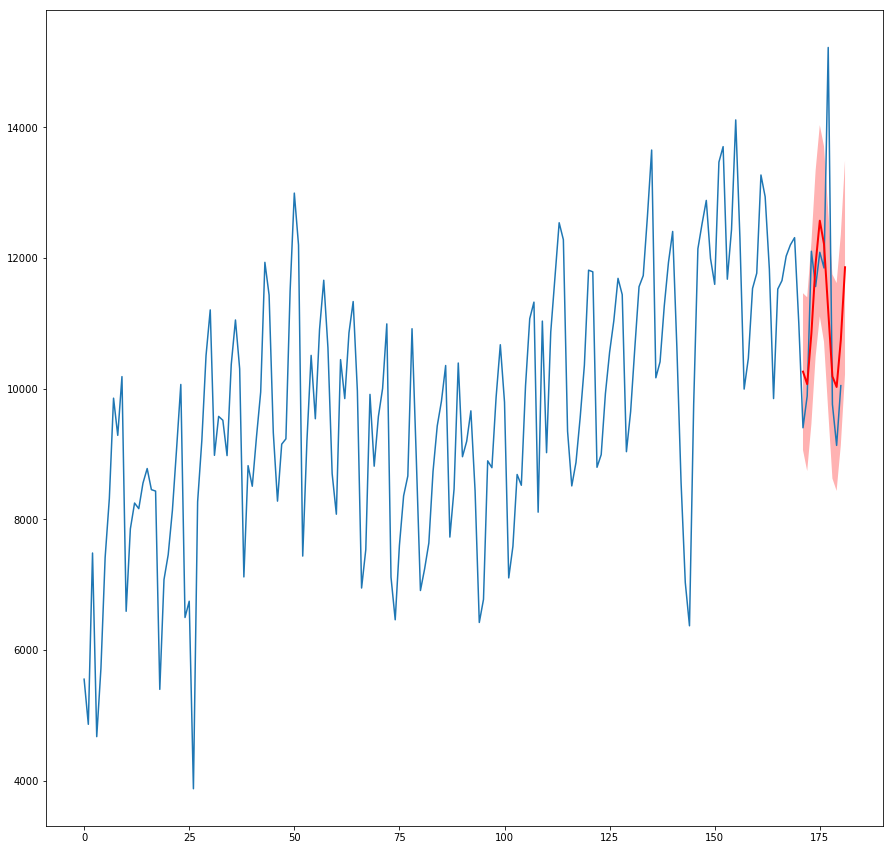

In [277]:
c1 = df['30-40'].as_matrix()
c1 = c1.astype('float64')
nn = c1.shape[0]-10
end_nn = c1.shape[0]
p = 5
q = 4

model = train_arma(p,q,c1,nn)
data_pred, stderr, conf_int = predict_arma(end_nn-nn+1,model)

fig, ax = plt.subplots(1,figsize=(15,15))

ax.plot(range(c1.shape[0]),c1)
ax.plot(range(nn,end_nn+1,1), data_pred, lw=2, label='mean population 2', color='red')
ax.fill_between(range(nn,end_nn+1,1), conf_int[:,0], conf_int[:,1], facecolor='red', alpha=0.3)

[ 23.67460143  18.82703412  16.46080513  16.21579837  18.43480972
  21.71729978  23.43663475  21.85901847  18.25809801  15.29963197
  14.96134698]
[[ 18.6375285   28.71167437]
 [ 13.74688386  23.90718439]
 [ 11.37798533  21.54362493]
 [ 10.88583258  21.54576416]
 [ 12.92393952  23.94567992]
 [ 16.18396993  27.25062964]
 [ 17.79277033  29.08049917]
 [ 16.03118144  27.68685551]
 [ 12.36087138  24.15532464]
 [  9.37739117  21.22187278]
 [  9.01210199  20.91059197]]


/Users/feiyanhu/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


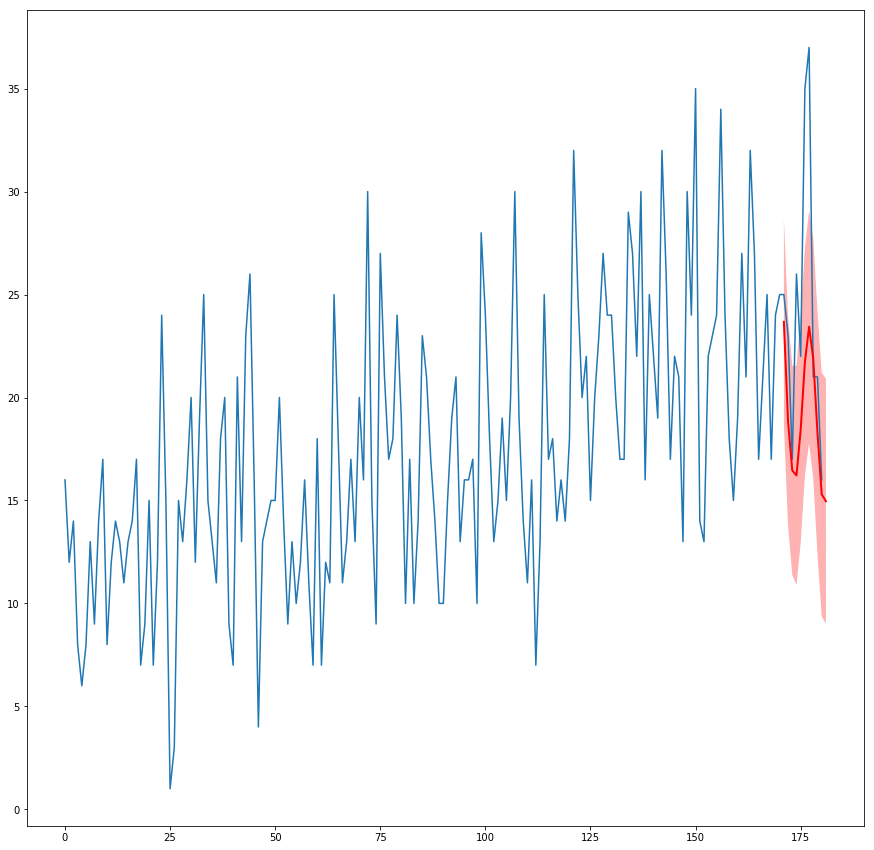

In [282]:
#print df
c1 = df['40-50'].as_matrix()
c1 = c1.astype('float64')
nn = c1.shape[0]-10
end_nn = c1.shape[0]
p = 6
q = 2

model = train_arma(p,q,c1,nn)
data_pred, stderr, conf_int = predict_arma(end_nn-nn+1,model)

fig, ax = plt.subplots(1,figsize=(15,15))

ax.plot(range(c1.shape[0]),c1)
ax.plot(range(nn,end_nn+1,1), data_pred, lw=2, label='mean population 2', color='red')
ax.fill_between(range(nn,end_nn+1,1), conf_int[:,0], conf_int[:,1], facecolor='red', alpha=0.3)

In [232]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
input_dim = 150

In [246]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

In [247]:
# split into train and test sets
#scaler = MinMaxScaler(feature_range=(0, 1))
#data = scaler.fit_transform(data)
data = read_resample(file_path + uber2014,'D')
data = data.astype('float64')
#print data.shape
nn = 173
end_nn = 183

train_size = int(len(data) * 0.9)
test_size = len(data) - train_size
train = np.asarray([data[0:train_size]])
test = np.asarray(data[train_size:len(data)])
print train, test
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

(183,)
[14546 17474 20701 26714 19521 13445 19550 16188 16843 20041 20420 18170
 12112 12674 20641 17717 20973 18074 14602 11017 13162 16975 20346 23352
 25095 24925 14677 15475 22835 36251 23375 24235 22234 13918 17859 19300
 21891 27513 26385 22550 14901 17470 19498 22218 26301 32493 22294 16508
 18315 20860 23508 26802 26465 14651 10841 10202 17004 22240 24930 24413
 21261 15967 17503 22674 22831 28371 24683 20889 15749 23244 22874 25716
 29844 31207 19327 14511 17778 21807 24647 28594 24271 19940 16322 17735
 20779 26460 28516 24895 21208 17107 18395 21228 26480 21597 14148 10890
 11443 18280 25763 27817 30541 28752 25936 21082 27350 33845 28607 30710
 29860 25726 21212 23578 29029 34073 32050 29975 27708 22590 23981 27589
 30740 33541 32353 28678 23146 24952 28094 30495 32759 30411 26286 20584
 22632 29646 29788 30457 28974 26234 21209 21956 24834 27955 32304 29512
 27097 22036 22093 24550 27018 28597 27424 23930 23271 19961 28831 32631
 38360 42319 40520 30134 30360 34560 35910 3

Epoch 1/10


AttributeError: 'ProgbarLogger' object has no attribute 'log_values'

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))